# SAINT GALLEN STARTHACK

# Imports and Analysis

In [40]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
#import seaborn as sns

In [41]:
dataPeople = pd.read_csv('eigenschaften-sozialhilfeempfaenger-stadt-st-gallen.csv',delimiter=";")
print(dataPeople.shape)
dataPeople.head()

(4711, 17)


,id,Dossier structure,Dossier type,Product of last dossier version,Personal household (support unit),Persons in household total,Person category,Marital status,Nationality categories,In CH since birth,Age categories,Employment situation,Degree of employment,Part-time reason,Highest completed education,Trained profession category,last job category
0,id01115,Sozialhilfe,Ausländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,geschieden,EU / EFTA,False,46-55,vorübergehend arbeitsunfähig,NaN,NaN,nicht feststellbar,kein | keine,Verkaufskräfte
1,id03188,Sozialhilfe,Ausländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,ledig,EU / EFTA,True,36-45,Dauerinvalidität,NaN,NaN,Anlehre,Berufe im Bereich personenbezogener Dienstleis...,Hilfsarbeiter in der Land- und Forstwirtschaft...
2,id02902,Sozialhilfe,Ausländer/innen,Sozialhilfeleistung,1,Mehrfachhaushalt (2-3),Alleinstehend,ledig,EU / EFTA,True,36-45,vorübergehend arbeitsunfähig,NaN,NaN,Anlehre,Bau- und Ausbaufachkräfte sowie verwandte Beru...,Bau- und Ausbaufachkräfte sowie verwandte Beru...
3,id04640,Sozialhilfe,Ausländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,geschieden,EU / EFTA,False,56-65,Arbeit auf Abruf,Eine Teilzeitstelle (bis 49%),keine Vollzeitstelle,nicht feststellbar,kein | keine,Reinigungspersonal und Hilfskräfte
4,id03380,Sozialhilfe,Ausländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,ledig,EU / EFTA,True,36-45,"ohne Arbeit, nicht beim Arbeitsamt gemeldet",NaN,NaN,obligatorische Schule,kein | keine,Verkaufskräfte


In [42]:
print('The data types are: ')
dataPeople.dtypes


The data types are: 


id                                   object
Dossier structure                    object
Dossier type                         object
Product of last dossier version      object
Personal household (support unit)    object
Persons in household total           object
Person category                      object
Marital status                       object
Nationality categories               object
In CH since birth                      bool
Age categories                       object
Employment situation                 object
Degree of employment                 object
Part-time reason                     object
Highest completed education          object
Trained profession category          object
last job category                    object
dtype: object

In [43]:
dataPeople.describe(include=['object'])

,id,Dossier structure,Dossier type,Product of last dossier version,Personal household (support unit),Persons in household total,Person category,Marital status,Nationality categories,Age categories,Employment situation,Degree of employment,Part-time reason,Highest completed education,Trained profession category,last job category
count,4711,4711,4711,4711,4711,4711,4711,4709,4711,4711,4459,955,625,4556,4509,4374
unique,4711,1,7,2,4,3,4,4,8,5,22,6,6,8,42,45
top,id01115,Sozialhilfe,Inländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,ledig,Schweiz,26-35,"ohne Arbeit, nicht beim Arbeitsamt gemeldet",Eine Teilzeitstelle (bis 49%),keine Vollzeitstelle,obligatorische Schule,kein | keine,kein | keine
freq,1,4711,2317,4443,3433,2359,3431,2470,2408,1236,1391,382,413,2208,2595,611


In [44]:
for feature in dataPeople.columns:
    print(feature,' diff values :',len(dataPeople[feature].unique()),' first:',dataPeople[feature][0])


id  diff values : 4711  first: id01115
Dossier structure  diff values : 1  first: Sozialhilfe
Dossier type  diff values : 7  first: Ausländer/innen
Product of last dossier version  diff values : 2  first: Sozialhilfeleistung
Personal household (support unit)  diff values : 4  first: 1
Persons in household total  diff values : 3  first: Einzelhaushalt
Person category  diff values : 4  first: Alleinstehend
Marital status  diff values : 5  first: geschieden
Nationality categories  diff values : 8  first: EU / EFTA
In CH since birth  diff values : 2  first: False
Age categories  diff values : 5  first: 46-55
Employment situation  diff values : 23  first: vorübergehend arbeitsunfähig
Degree of employment  diff values : 7  first: nan
Part-time reason  diff values : 7  first: nan
Highest completed education  diff values : 9  first: nicht feststellbar
Trained profession category  diff values : 43  first: kein | keine
last job category  diff values : 46  first: Verkaufskräfte


In [45]:
#feature Dossier structure has only one value so we delete it
del dataPeople['Dossier structure']

In [46]:
probs = dataPeople['Product of last dossier version'].value_counts(normalize=True)
print(probs)

Sozialhilfeleistung    0.943112
Rückerstattung         0.056888
Name: Product of last dossier version, dtype: float64


In [47]:
dataDossier = pd.read_csv('verlaufe-sozialhilfe-ruckerstattungen-stadt-stgallen.csv',delimiter=";")
dataDossier.head()

,ID,Dossier von,Dossier bis,Produkt
0,id02270,2021-08,2021-12,Sozialhilfeleistung
1,id03410,2019-08,2021-01,Sozialhilfeleistung
2,id01383,2019-02,2019-05,Sozialhilfeleistung
3,id02268,2019-07,2021-12,Sozialhilfeleistung
4,id04133,2019-07,2020-02,Sozialhilfeleistung


# Create Target Value

In [48]:
pendingDocuments = dataDossier['ID'][dataDossier['Dossier bis'].isna()].sort_values()

dataPeople.loc[(dataPeople['Product of last dossier version'] == 'Rückerstattung') & (dataPeople['id'].isin(pendingDocuments)) , 'target'] = 'Rembursing'
dataPeople.loc[(dataPeople['Product of last dossier version'] == 'Rückerstattung') & ~(dataPeople['id'].isin(pendingDocuments)) , 'target'] = 'Finish Reimbursing'
dataPeople.loc[(dataPeople['Product of last dossier version'] == 'Sozialhilfeleistung') & (dataPeople['id'].isin(pendingDocuments)) , 'target'] = 'Help pending'
dataPeople.loc[(dataPeople['Product of last dossier version'] == 'Sozialhilfeleistung') & ~(dataPeople['id'].isin(pendingDocuments)) , 'target'] = 'Finish help'

#test should have 
#   Finish Reimbursing
#   Help pending
#   Finish help
#   Finish help
#   Help pending
print("id00001 status:",dataPeople.loc[dataPeople['id'] == 'id00001']['target'])
print("id00002 status:",dataPeople.loc[dataPeople['id'] == 'id00002']['target'])
print("id00003 status:",dataPeople.loc[dataPeople['id'] == 'id00003']['target'])
print("id00004 status:",dataPeople.loc[dataPeople['id'] == 'id00004']['target'])
print("id00005 status:",dataPeople.loc[dataPeople['id'] == 'id00005']['target'])


id00001 status: 3966    Finish Reimbursing
Name: target, dtype: object
id00002 status: 502    Help pending
Name: target, dtype: object
id00003 status: 2930    Finish help
Name: target, dtype: object
id00004 status: 357    Finish help
Name: target, dtype: object
id00005 status: 2647    Help pending
Name: target, dtype: object


In [49]:
probs = dataPeople['target'].value_counts()
print(probs)

Finish help           2983
Help pending          1460
Finish Reimbursing     162
Rembursing             106
Name: target, dtype: int64


# Feature Selection


## Prepare data for feature selection


In [50]:
# prepare input data
def prepare_inputs(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_enc = oe.transform(X)
    return X_enc

# prepare target
def prepare_targets(y):
    le = LabelEncoder()
    le.fit(y)
    y_enc = le.transform(y)
    return y_enc
 
#prepare data
Allcolumns = ['target','id','Dossier type','Product of last dossier version','Personal household (support unit)','Persons in household total','Person category','Marital status','Nationality categories','In CH since birth','Age categories','Employment situation','Degree of employment','Part-time reason','Highest completed education','Trained profession category','last job category']
dropColumns = ['target','id','Product of last dossier version']
keptColumns = list(set(Allcolumns)-set(dropColumns))
print('dropColumns:',dropColumns,"\n")
print('keptColumns',keptColumns,"\n")

#Replace NaN with string NAN
dataNaN = dataPeople.copy()
for f in dataNaN.columns:
    dataNaN[f].fillna(value='NAN', inplace=True)

X = dataNaN.drop(columns=dropColumns) #remove id bc not a categorical value was used to create the target
y = dataPeople['target']


print("X columns:",X.columns,"\n")

    

dropColumns: ['target', 'id', 'Product of last dossier version'] 

keptColumns ['Nationality categories', 'Person category', 'Dossier type', 'last job category', 'Personal household (support unit)', 'Degree of employment', 'Age categories', 'Employment situation', 'Marital status', 'Trained profession category', 'Persons in household total', 'Highest completed education', 'Part-time reason', 'In CH since birth'] 

X columns: Index(['Dossier type', 'Personal household (support unit)',
       'Persons in household total', 'Person category', 'Marital status',
       'Nationality categories', 'In CH since birth', 'Age categories',
       'Employment situation', 'Degree of employment', 'Part-time reason',
       'Highest completed education', 'Trained profession category',
       'last job category'],
      dtype='object') 



In [51]:
# prepare input data
X_enc = prepare_inputs(X)
# prepare output data
y_enc = prepare_targets(y)

print('X_enc:',X_enc[:5])
print('y_enc:',y_enc[:5])

X_enc: [[ 0.  0.  0.  0.  1.  2.  0.  3. 20.  3.  2.  7. 42. 44.]
 [ 0.  0.  0.  0.  2.  2.  1.  2.  6.  3.  2.  0.  5. 24.]
 [ 0.  0.  1.  0.  2.  2.  1.  2. 20.  3.  2.  0.  3.  4.]
 [ 0.  0.  0.  0.  1.  2.  0.  4.  2.  1.  6.  7. 42. 38.]
 [ 0.  0.  0.  0.  2.  2.  1.  2. 19.  3.  2.  8. 42. 44.]]
y_enc: [1 1 2 2 1]


## Chi test feature selection

In [52]:
fs_chi = chi2(X_enc,y_enc)[1]
order_chi = np.argsort(fs_chi)
orderedScores_chi = fs_chi[np.array(order_chi)]
print('orderedScores:',orderedScores_chi)
orderedFeatures_chi = np.array(X.columns)[np.array(order_chi)]
print('orderedFeatures:',orderedFeatures_chi)

orderedScores: [4.13057999e-26 3.75096565e-24 1.47947305e-11 5.77104672e-10
 3.72064211e-09 1.81188491e-08 3.00819727e-06 4.00652855e-05
 3.33062774e-04 8.37837410e-02 1.14227409e-01 1.40010695e-01
 3.01259021e-01 3.19255612e-01]
orderedFeatures: ['Trained profession category' 'Employment situation'
 'Nationality categories' 'Person category' 'In CH since birth'
 'Personal household (support unit)' 'Highest completed education'
 'Dossier type' 'Age categories' 'Degree of employment'
 'last job category' 'Persons in household total' 'Marital status'
 'Part-time reason']


Feature [Trained profession category] 0: 0.000000
Feature [Employment situation] 1: 0.000000
Feature [Nationality categories] 2: 0.000000
Feature [Person category] 3: 0.000000
Feature [In CH since birth] 4: 0.000000
Feature [Personal household (support unit)] 5: 0.000000
Feature [Highest completed education] 6: 0.000003
Feature [Dossier type] 7: 0.000040
Feature [Age categories] 8: 0.000333
Feature [Degree of employment] 9: 0.083784
Feature [last job category] 10: 0.114227
Feature [Persons in household total] 11: 0.140011
Feature [Marital status] 12: 0.301259
Feature [Part-time reason] 13: 0.319256


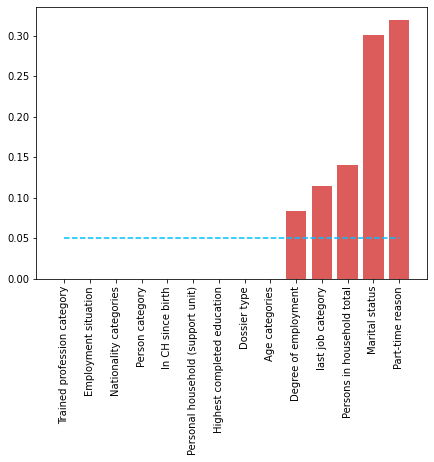

In [53]:
# what are scores for the features
for i in range(len(orderedScores_chi)):
	print('Feature [%s] %d: %f' % (orderedFeatures_chi[i],i, orderedScores_chi[i]))
# plot the scores
pyplot.figure(figsize=(7,5))
pyplot.xticks(np.arange(len(orderedScores_chi)),orderedFeatures_chi,rotation='vertical')
pyplot.bar(orderedFeatures_chi,orderedScores_chi,color="#DC5C5C")
pyplot.plot(orderedFeatures_chi,[.05 for i in orderedFeatures_chi],color='#00C0FF', linestyle='dashed')
pyplot.show()

## ANOVA test

Feature [In CH since birth] 0: 0.000000
Feature [Nationality categories] 1: 0.000000
Feature [Employment situation] 2: 0.000000
Feature [Age categories] 3: 0.000011
Feature [Personal household (support unit)] 4: 0.000044
Feature [Person category] 5: 0.000044
Feature [Degree of employment] 6: 0.000139
Feature [Dossier type] 7: 0.000174
Feature [Trained profession category] 8: 0.001266
Feature [Marital status] 9: 0.001989
Feature [Highest completed education] 10: 0.004072
Feature [Persons in household total] 11: 0.077260
Feature [Part-time reason] 12: 0.129101
Feature [last job category] 13: 0.891527


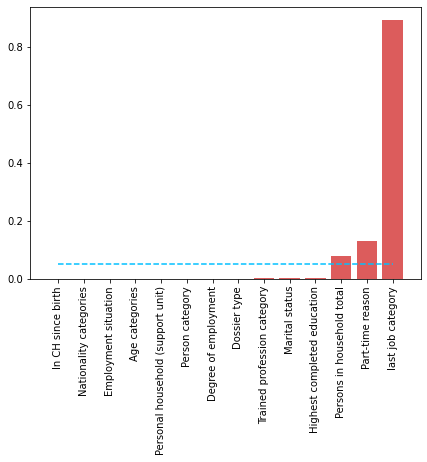

In [54]:
# feature selection

fs_AN = f_classif(X_enc,y_enc)[1]

order_AN = np.argsort(fs_AN)
orderedScores_AN = fs_AN[np.array(order_AN)]
orderedFeatures_AN = np.array(X.columns)[np.array(order_AN)]

# what are scores for the features
for i in range(len(orderedScores_AN)):
	print('Feature [%s] %d: %f' % (orderedFeatures_AN[i],i, orderedScores_AN[i]))
# plot the scores
pyplot.figure(figsize=(7,5))
pyplot.xticks(np.arange(len(orderedScores_AN)),orderedFeatures_AN,rotation='vertical')
pyplot.bar(orderedFeatures_AN,orderedScores_AN,color="#DC5C5C")
pyplot.plot(orderedFeatures_AN,[.05 for i in orderedFeatures_AN],color='#00C0FF', linestyle='dashed')
pyplot.show()

## Mutual Information

Feature [Employment situation] 0: 0.038422
Feature [Highest completed education] 1: 0.023821
Feature [In CH since birth] 2: 0.015194
Feature [Nationality categories] 3: 0.012806
Feature [Dossier type] 4: 0.011003
Feature [last job category] 5: 0.005860
Feature [Degree of employment] 6: 0.005119
Feature [Part-time reason] 7: 0.003549
Feature [Age categories] 8: 0.003395
Feature [Marital status] 9: 0.000824
Feature [Persons in household total] 10: 0.000258
Feature [Trained profession category] 11: 0.000000
Feature [Person category] 12: 0.000000
Feature [Personal household (support unit)] 13: 0.000000


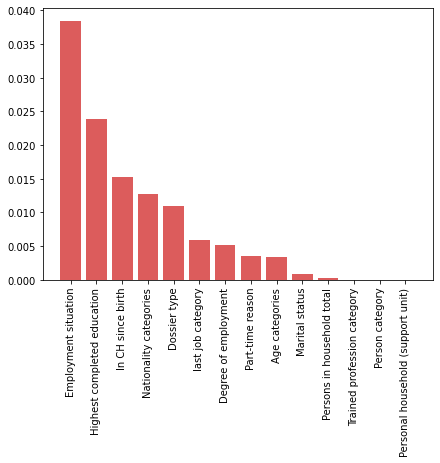

In [55]:
# feature selection

fs_MI = mutual_info_classif(X_enc,y_enc,n_neighbors=3)

order_MI = np.argsort(fs_MI)[::-1]
orderedScores_MI = fs_MI[np.array(order_MI)]
orderedFeatures_MI = np.array(X.columns)[np.array(order_MI)]

# what are scores for the features
for i in range(len(orderedScores_MI)):
	print('Feature [%s] %d: %f' % (orderedFeatures_MI[i],i, orderedScores_MI[i]))
# plot the scores
pyplot.figure(figsize=(7,5))
pyplot.xticks(np.arange(len(orderedScores_MI)),orderedFeatures_MI,rotation='vertical')
pyplot.bar(orderedFeatures_MI,orderedScores_MI,color="#DC5C5C")
pyplot.show()

## Remove unsignificant features

In [56]:
dropSelective = np.squeeze(np.array(X.columns)[np.intersect1d(np.argwhere(fs_AN>.05),np.argwhere(fs_chi>.05))])
dropRestrictive =  np.squeeze(np.array(X.columns)[np.unique(np.concatenate((np.squeeze(np.argwhere(fs_AN>.05)),np.squeeze(np.argwhere(fs_chi>.05)))))])
print("Features to drop (selective) :",dropSelective)
print("Features to drop (restrictive) :",dropRestrictive)

Xsel = X.drop(columns=dropSelective)
Xres = X.drop(columns=dropRestrictive)

Features to drop (selective) : ['Persons in household total' 'Part-time reason' 'last job category']
Features to drop (restrictive) : ['Persons in household total' 'Marital status' 'Degree of employment'
 'Part-time reason' 'last job category']


# Different profiles 

## Kmodes: Clustering to find the differents profiles

We don't remove the unimportant features here. Because they still help to group similar people even if don't help to predict target.

In [57]:
from kmodes.kmodes import KModes


def saveClusterToCsv(nbClusters):
    # random categorical data
    subsetColumns = dataNaN.drop(columns={'target','id','Product of last dossier version'},axis=1)
    dataXnan = subsetColumns.values

    km = KModes(n_clusters=nbClusters, init='Huang', n_init=5, verbose=0)

    fitclusters = km.fit_predict(dataXnan)

    clusterCentroid = pd.DataFrame(km.cluster_centroids_)
    clusterCentroid.columns = subsetColumns.columns
    clusterCentroid['In CH since birth'] = clusterCentroid['In CH since birth'].astype(bool)
    
    clusterCentroid.to_csv("deutchClusters/clusterCentroid"+str(nbClusters)+".csv") 

    return clusterCentroid



In [58]:
clustersCentroids3 = saveClusterToCsv(3)

In [59]:
clustersCentroids5 = saveClusterToCsv(5)

In [60]:
clustersCentroids7 = saveClusterToCsv(7)

In [61]:
clustersCentroids10 = saveClusterToCsv(10)

## Predict for each profile

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def trainRandomForestClasssifier(enc_data, enc_target):
    balances = pd.DataFrame(enc_target).value_counts(normalize=True).to_dict()
    clf = GradientBoostingClassifier()
    return clf.fit(enc_data, enc_target)

#Tried to correct the skewness of 93% but only a small improvement
"""
def undersample(enc_data,enc_target):
    smpls_per_cls = 50*min(pd.DataFrame(enc_target).value_counts())
    order = np.argsort(enc_target)
    splits = np.split(enc_data[order], np.squeeze(np.where(np.diff(enc_target[order])))+1)
    results = []
    for slice in splits:
        results.append(slice[np.random.randint(0,high=slice.shape[0],size=smpls_per_cls)])
    und_data = np.squeeze(results).reshape((len(splits)*smpls_per_cls,enc_data.shape[1]))
    und_target = np.repeat([0,1,2,3],smpls_per_cls)
    order = np.arange(und_data.shape[0])
    np.random.shuffle(order)
    return und_data[order], und_target[order]
    """

    
# prepare input data
def prepare_inputs(X):
	oe = OrdinalEncoder()
	oe.fit(X)
	X_enc = oe.transform(X)
	return X_enc,oe

# prepare target
def prepare_targets(y):
	le = LabelEncoder()
	le.fit(y)
	y_enc = le.transform(y)
	return y_enc,le

#big function with everything
def trainAndPredict(X,y,XtoPredict,columnsToDrop):
    X_dropped = X.drop(columns=columnsToDrop).drop(columns={'target','id','Product of last dossier version'})

    X_enc, oe = prepare_inputs(X_dropped)
    y_encoded, le = prepare_targets(y)
    X_train, X_test, y_train, y_test = train_test_split(X_enc, y_encoded, test_size=0.33, random_state=42)
    rndForestClass = trainRandomForestClasssifier(X_train,y_train)
    
    XtoPredict_drop = XtoPredict.drop(columns=columnsToDrop)
    XtoPredict_enc = oe.transform(XtoPredict_drop)
    yPredicted_enc = rndForestClass.predict(XtoPredict_enc)
    XtoPredict['predictedTarget'] = le.inverse_transform(yPredicted_enc)

    accuracy,freqClasses = accuraryOfModel(rndForestClass,X_test,y_test)

    return XtoPredict,accuracy,freqClasses

def accuraryOfModel(classifier,x_test,y_true):
    y_pred = classifier.predict(x_test)
    freqClass = np.zeros(4)
    for i in (np.unique(y_pred)):
        freqClass[i] = np.sum(np.ones(len(y_pred))[np.where(y_pred==i)]) / len(y_pred)
    
    return accuracy_score(y_true, y_pred), freqClass

print(dataPeople['target'].value_counts(normalize=True),"\n")

Finish help           0.633199
Help pending          0.309913
Finish Reimbursing    0.034388
Rembursing            0.022501
Name: target, dtype: float64 



In [69]:
Sel_XtoPredict,Sel_accuracy,Sel_freqClasses = trainAndPredict(dataNaN,dataPeople['target'],clustersCentroids3.copy(),dropSelective)
print("Selective features",Sel_accuracy,"\nclasses freq:",Sel_freqClasses,"\n")

Res_XtoPredict,Res_accuracy,Res_freqClasses = trainAndPredict(dataNaN,dataPeople['target'],clustersCentroids3.copy(),dropRestrictive)
print("Restrictive features",Res_accuracy,"\nclasses freq:",Res_freqClasses,"\n")

All_XtoPredict,All_accuracy,All_freqClasses = trainAndPredict(dataNaN,dataPeople['target'],clustersCentroids3.copy(),[])
print("Restrictive features",All_accuracy,"\nclasses freq:",All_freqClasses,"\n")

Selective features 0.6501607717041801 
classes freq: [0.0096463  0.88874598 0.09839228 0.00321543] 

Restrictive features 0.647588424437299 
classes freq: [0.00707395 0.88424437 0.10610932 0.00257235] 

Restrictive features 0.6424437299035369 
classes freq: [0.0096463  0.88038585 0.10610932 0.00385852] 

